<a href="https://colab.research.google.com/github/0xmeach/Portfolio/blob/main/Neural_Net1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

x_train = tf.keras.utils.normalize(x_train, axis=1)  #scales the pixel values between 0 and 1
x_test = tf.keras.utils.normalize(x_train, axis=1)   #scales the pixel values between 0 and 1

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  #output layer - 10 refers to neurons representing digits 0-9 and softmax gives a probability)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9252
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1034 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9773


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [14]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [15]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [16]:
predictions = new_model.predict([x_test])

In [17]:
print(predictions)

[[3.19155265e-13 7.08690914e-06 1.11135332e-08 ... 7.29271621e-09
  1.98024735e-10 4.57824655e-07]
 [9.99748409e-01 2.45510023e-06 1.34997492e-04 ... 1.55898670e-05
  8.97322138e-07 1.10202709e-05]
 [9.18886656e-09 4.14973765e-04 5.14750518e-02 ... 3.37365491e-04
  4.99129092e-05 4.20198177e-07]
 ...
 [2.87132717e-14 4.95660535e-09 1.52438690e-13 ... 3.56377623e-12
  7.88505483e-10 1.30734213e-06]
 [1.34656639e-05 2.33687169e-05 6.04472407e-05 ... 3.10841926e-07
  1.32904433e-05 1.44808382e-07]
 [1.55659620e-06 7.04379417e-08 1.22560195e-05 ... 4.42915876e-07
  9.99628782e-01 1.87961472e-04]]


In [23]:
import numpy as np

print(np.argmax(predictions[5]))

2


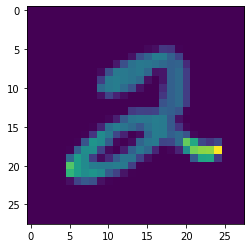

In [22]:
plt.imshow(x_test[5])
plt.show()